# 📊 Factor-Based Stock Clustering using PCA and KMeans

In [12]:
%matplotlib inline


In [7]:
# ✅ Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [8]:
# ✅ Create Sample Financial Factor Data
data = {
    'Ticker': ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NFLX', 'NVDA'],
    'PE': [25.3, 28.7, 22.1, 70.0, 55.0, 18.4, 35.8, 30.2],
    'ROE': [18.5, 20.1, 17.8, 5.0, 15.0, 21.7, 12.1, 24.2],
    'DebtEquity': [0.4, 0.3, 0.5, 1.1, 0.9, 0.3, 1.0, 0.2],
    'Momentum': [0.12, 0.10, 0.08, 0.03, 0.05, 0.11, 0.02, 0.14]
}

df = pd.DataFrame(data)
df.set_index('Ticker', inplace=True)
df

,PE,ROE,DebtEquity,Momentum
Ticker,,,,
AAPL,25.3,18.5,0.4,0.12
MSFT,28.7,20.1,0.3,0.10
GOOGL,22.1,17.8,0.5,0.08
AMZN,70.0,5.0,1.1,0.03
TSLA,55.0,15.0,0.9,0.05
META,18.4,21.7,0.3,0.11
NFLX,35.8,12.1,1.0,0.02
NVDA,30.2,24.2,0.2,0.14


In [9]:
# ✅ Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [10]:
# ✅ Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=df.index)
pca_df

,PC1,PC2
Ticker,,
AAPL,-1.206712,0.113800
MSFT,-1.171220,0.079310
GOOGL,-0.590332,-0.630688
AMZN,3.446977,0.677097
TSLA,1.569027,0.351975
META,-1.723606,-0.289301
NFLX,1.818288,-1.053943
NVDA,-2.142423,0.751750


In [11]:
# ✅ Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df)
pca_df

C:\Users\HP PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,PC1,PC2,Cluster
Ticker,,,
AAPL,-1.206712,0.113800,2
MSFT,-1.171220,0.079310,2
GOOGL,-0.590332,-0.630688,0
AMZN,3.446977,0.677097,1
TSLA,1.569027,0.351975,1
META,-1.723606,-0.289301,2
NFLX,1.818288,-1.053943,1
NVDA,-2.142423,0.751750,2


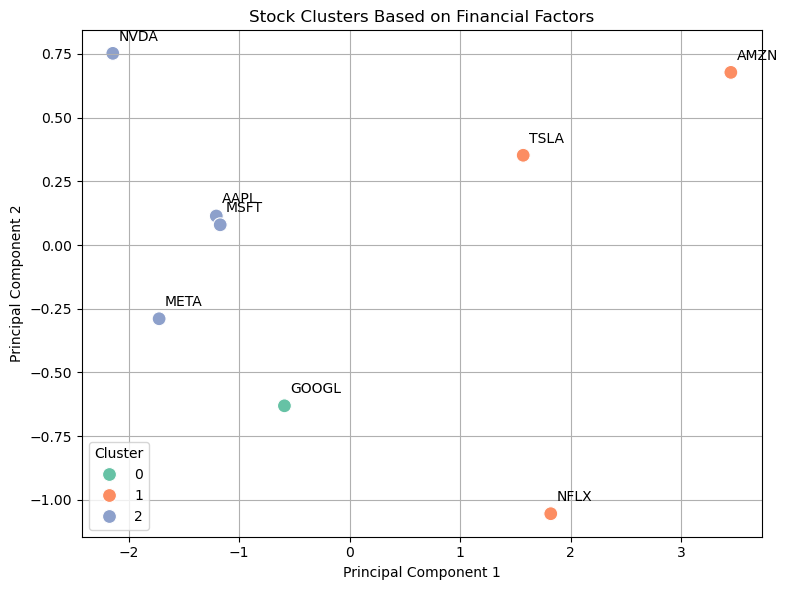

In [12]:
# ✅ Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)

# Add ticker labels
for ticker in pca_df.index:
    plt.text(pca_df.loc[ticker, 'PC1']+0.05, pca_df.loc[ticker, 'PC2']+0.05, ticker)

plt.title('Stock Clusters Based on Financial Factors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
import yfinance as yf
import pandas as pd

# List of top 50 Indian stock tickers (Yahoo Finance format)
tickers = [
    'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'INFY.NS',
    'HINDUNILVR.NS', 'ITC.NS', 'SBIN.NS', 'BHARTIARTL.NS', 'KOTAKBANK.NS',
    'BAJFINANCE.NS', 'LT.NS', 'ASIANPAINT.NS', 'HCLTECH.NS', 'AXISBANK.NS',
    'MARUTI.NS', 'SUNPHARMA.NS', 'DMART.NS', 'WIPRO.NS', 'ULTRACEMCO.NS',
    'NTPC.NS', 'TITAN.NS', 'TECHM.NS', 'POWERGRID.NS', 'JSWSTEEL.NS',
    'TATASTEEL.NS', 'BAJAJFINSV.NS', 'NESTLEIND.NS', 'HDFCLIFE.NS', 'ONGC.NS',
    'COALINDIA.NS', 'SBILIFE.NS', 'INDUSINDBK.NS', 'HINDALCO.NS', 'ADANIENT.NS',
    'DIVISLAB.NS', 'GRASIM.NS', 'DRREDDY.NS', 'CIPLA.NS', 'BPCL.NS',
    'BAJAJ-AUTO.NS', 'BRITANNIA.NS', 'EICHERMOT.NS', 'ICICIPRULI.NS', 'M&M.NS',
    'TATAMOTORS.NS', 'HEROMOTOCO.NS', 'DLF.NS', 'PIDILITIND.NS', 'SHREECEM.NS'
]

# Download 6-month price data to calculate momentum
momentum_values = []
failed_tickers = []

for ticker in tickers:
    try:
        data = yf.download(ticker, period="6mo", interval="1d", progress=False)
        if not data.empty:
            price_start = data['Close'].iloc[0]
            price_end = data['Close'].iloc[-1]
            momentum = (price_end - price_start) / price_start
            momentum_values.append(momentum)
        else:
            momentum_values.append(None)
            failed_tickers.append(ticker)
    except Exception as e:
        momentum_values.append(None)
        failed_tickers.append(ticker)

# Create DataFrame
df = pd.DataFrame({
    'Ticker': tickers,
    'Momentum': momentum_values
}).dropna()

df.set_index("Ticker", inplace=True)
df.head()
display(df)

C:\Users\HP PC\AppData\Local\Temp\ipykernel_15340\3267898764.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="6mo", interval="1d", progress=False)
C:\Users\HP PC\AppData\Local\Temp\ipykernel_15340\3267898764.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="6mo", interval="1d", progress=False)
C:\Users\HP PC\AppData\Local\Temp\ipykernel_15340\3267898764.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="6mo", interval="1d", progress=False)
C:\Users\HP PC\AppData\Local\Temp\ipykernel_15340\3267898764.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="6mo", interval="1d", progress=False)
C:\Users\HP PC\AppData\Local\Temp\ipykernel_15340\3267898764.py:24: FutureWarning: YF.download() has changed argument au

,Momentum
Ticker,
RELIANCE.NS,Ticker RELIANCE.NS 0.206116 dtype: float64
TCS.NS,Ticker TCS.NS -0.153098 dtype: float64
HDFCBANK.NS,Ticker HDFCBANK.NS 0.105794 dtype: float64
ICICIBANK.NS,Ticker ICICIBANK.NS 0.09901 dtype: float64
INFY.NS,Ticker INFY.NS -0.141438 dtype: float64
HINDUNILVR.NS,Ticker HINDUNILVR.NS -0.012898 dtype: float64
ITC.NS,Ticker ITC.NS -0.096941 dtype: float64
SBIN.NS,Ticker SBIN.NS 0.004511 dtype: float64
BHARTIARTL.NS,Ticker BHARTIARTL.NS 0.228884 dtype: float64


In [21]:
df_fund = pd.read_csv("top 50 companies.csv", encoding='ISO-8859-1')
df_fund.head()


,S.No.,Unnamed: 1,Name,CMP Rs.,P/E,ROCE %,Debt / Eq
0,1,NaN,Shree Cement,29200.0,93.82,6.74,0.05
1,2,NaN,Pidilite Inds.,3001.0,72.91,29.86,0.05
2,3,NaN,DLF,853.8,46.16,6.51,0.10
3,4,NaN,Hero Motocorp,4300.3,19.66,31.15,0.04
4,5,NaN,Tata Motors,674.4,8.80,19.97,0.62


In [3]:
name_to_ticker = {
    'Reliance Industries': 'RELIANCE.NS',
    'Tata Consultancy Services': 'TCS.NS',
    'HDFC Bank': 'HDFCBANK.NS',
    'ICICI Bank': 'ICICIBANK.NS',
    'Infosys': 'INFY.NS',
    'Hindustan Unilever': 'HINDUNILVR.NS',
    'ITC': 'ITC.NS',
    'State Bank of India': 'SBIN.NS',
    'Bharti Airtel': 'BHARTIARTL.NS',
    'Kotak Mahindra Bank': 'KOTAKBANK.NS',
    'Bajaj Finance': 'BAJFINANCE.NS',
    'Larsen & Toubro': 'LT.NS',
    'Asian Paints': 'ASIANPAINT.NS',
    'HCL Technologies': 'HCLTECH.NS',
    'Axis Bank': 'AXISBANK.NS',
    'Maruti Suzuki': 'MARUTI.NS',
    'Sun Pharmaceutical': 'SUNPHARMA.NS',
    'Avenue Supermarts': 'DMART.NS',
    'Wipro': 'WIPRO.NS',
    'UltraTech Cement': 'ULTRACEMCO.NS',
    'NTPC': 'NTPC.NS',
    'Titan Company': 'TITAN.NS',
    'Tech Mahindra': 'TECHM.NS',
    'Power Grid Corporation': 'POWERGRID.NS',
    'JSW Steel': 'JSWSTEEL.NS',
    'Tata Steel': 'TATASTEEL.NS',
    'Bajaj Finserv': 'BAJAJFINSV.NS',
    'Nestle India': 'NESTLEIND.NS',
    'HDFC Life Insurance': 'HDFCLIFE.NS',
    'Oil & Natural Gas': 'ONGC.NS',
    'Coal India': 'COALINDIA.NS',
    'SBI Life Insurance': 'SBILIFE.NS',
    'IndusInd Bank': 'INDUSINDBK.NS',
    'Hindalco Industries': 'HINDALCO.NS',
    'Adani Enterprises': 'ADANIENT.NS',
    'Divi\'s Laboratories': 'DIVISLAB.NS',
    'Grasim Industries': 'GRASIM.NS',
    'Dr. Reddy\'s Laboratories': 'DRREDDY.NS',
    'Cipla': 'CIPLA.NS',
    'Bharat Petroleum': 'BPCL.NS',
    'Bajaj Auto': 'BAJAJ-AUTO.NS',
    'Britannia Industries': 'BRITANNIA.NS',
    'Eicher Motors': 'EICHERMOT.NS',
    'ICICI Prudential Life Insurance': 'ICICIPRULI.NS',
    'Mahindra & Mahindra': 'M&M.NS',
    'Tata Motors': 'TATAMOTORS.NS',
    'Hero Motocorp': 'HEROMOTOCO.NS',
    'DLF': 'DLF.NS',
    'Pidilite Industries': 'PIDILITIND.NS',
    'Shree Cement': 'SHREECEM.NS'

}


In [4]:
import pandas as pd

# Replace with your actual filename
df_fund = pd.read_csv("top 50 companies.csv", encoding="ISO-8859-1")
df_fund.head()


,S.No.,Unnamed: 1,Name,CMP Rs.,P/E,ROCE %,Debt / Eq
0,1,NaN,Shree Cement,29200.0,93.82,6.74,0.05
1,2,NaN,Pidilite Inds.,3001.0,72.91,29.86,0.05
2,3,NaN,DLF,853.8,46.16,6.51,0.10
3,4,NaN,Hero Motocorp,4300.3,19.66,31.15,0.04
4,5,NaN,Tata Motors,674.4,8.80,19.97,0.62


In [6]:
print(df_fund.columns.tolist())


['S.No.', 'Unnamed: 1', 'Name', 'CMP\xa0Rs.', 'P/E', 'ROCE\xa0%', 'Debt / Eq']


In [7]:
df_fund.columns = df_fund.columns.str.replace('\xa0', ' ').str.strip()

In [8]:
# Map tickers
df_fund['Ticker'] = df_fund['Name'].map(name_to_ticker)

# Drop unmapped rows
df_fund.dropna(subset=['Ticker'], inplace=True)

# Set ticker as index
df_fund.set_index('Ticker', inplace=True)

# Select and rename columns
df_fund = df_fund[['P/E', 'ROCE %', 'Debt / Eq']]
df_fund.rename(columns={'ROCE %': 'ROE'}, inplace=True)

# Convert to numeric
df_fund = df_fund.apply(pd.to_numeric, errors='coerce')
df_fund.dropna(inplace=True)

# Preview cleaned data
df_fund.head()

C:\Users\HP PC\AppData\Local\Temp\ipykernel_8552\3242614276.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fund.rename(columns={'ROCE %': 'ROE'}, inplace=True)


,P/E,ROE,Debt / Eq
Ticker,,,
SHREECEM.NS,93.82,6.74,0.05
DLF.NS,46.16,6.51,0.10
HEROMOTOCO.NS,19.66,31.15,0.04
TATAMOTORS.NS,8.80,19.97,0.62
EICHERMOT.NS,32.29,29.77,0.02


In [11]:
import yfinance as yf
import pandas as pd

# Use your tickers from df_fund
tickers = df_fund.index.tolist()

# Download adjusted close prices properly
price_data = yf.download(tickers, start="2024-01-01", end="2024-06-01", group_by='ticker', auto_adjust=True)

# Extract just the Adjusted Close prices into a new DataFrame
adj_close = pd.DataFrame()

for ticker in tickers:
    try:
        adj_close[ticker] = price_data[ticker]['Close']
    except KeyError:
        print(f"Skipping {ticker}, data not available")

# Drop any tickers with missing data
adj_close.dropna(axis=1, inplace=True)

# Calculate momentum = % change over last 3 months (~65 trading days)
momentum_scores = (adj_close.iloc[-1] - adj_close.iloc[-65]) / adj_close.iloc[-65]

# Create momentum DataFrame
df_momentum = pd.DataFrame(momentum_scores, columns=['Momentum'])
df_momentum.index.name = 'Ticker'

# Preview
df_momentum.head()


[*********************100%***********************]  28 of 28 completed


,Momentum
Ticker,
SHREECEM.NS,-0.072275
DLF.NS,-0.085850
HEROMOTOCO.NS,0.138917
TATAMOTORS.NS,-0.009975
EICHERMOT.NS,0.197917


In [12]:
# Merge the cleaned fundamental data with momentum scores
df_combined = df_fund.join(df_momentum, how='inner')

# Drop any rows with missing data (just in case)
df_combined.dropna(inplace=True)

# Preview the final merged dataset
df_combined.head()

,P/E,ROE,Debt / Eq,Momentum
Ticker,,,,
SHREECEM.NS,93.82,6.74,0.05,-0.072275
DLF.NS,46.16,6.51,0.10,-0.085850
HEROMOTOCO.NS,19.66,31.15,0.04,0.138917
TATAMOTORS.NS,8.80,19.97,0.62,-0.009975
EICHERMOT.NS,32.29,29.77,0.02,0.197917


In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Standardize the data before PCA (important)
from sklearn.preprocessing import StandardScaler

features = df_combined[['P/E', 'ROE', 'Debt / Eq', 'Momentum']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA (reduce to 2 components for easy plotting)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2'], index=df_combined.index)

In [15]:
# Cluster into 3 groups (you can try different values for n_clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Add cluster labels to the PCA DataFrame
df_pca['Cluster'] = clusters

C:\Users\HP PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


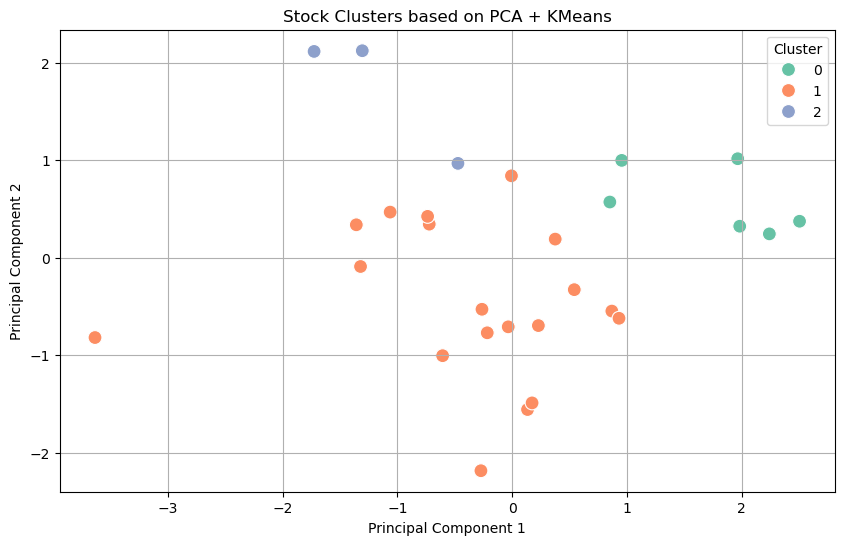

In [16]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title('Stock Clusters based on PCA + KMeans')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [17]:
df_combined['Cluster'] = df_pca['Cluster']
df_combined.to_csv("clustered_stocks.csv")

In [18]:
# Check cluster-wise averages
cluster_summary = df_combined.groupby('Cluster').mean().round(2)
cluster_summary

,P/E,ROE,Debt / Eq,Momentum
Cluster,,,,
0,25.03,8.54,5.96,0.02
1,33.35,27.73,0.46,0.02
2,79.06,11.81,0.42,-0.09


In [20]:
# Create a manual label mapping based on cluster_summary interpretation
cluster_labels = {
    0: 'Value & Momentum Leaders',
    1: 'High-Risk Underperformers',
    2: 'Quality Growth Stocks'
}


In [4]:
# Add new column with cluster names
df_combined['Cluster Label'] = df_combined['Cluster'].map(cluster_labels)

# Optional: reorder columns
df_combined = df_combined[['P/E', 'ROE', 'Debt / Eq', 'Momentum', 'Cluster', 'Cluster Label']]
df_combined.head()


NameError: name 'df_combined' is not defined

In [3]:
import pandas as pd
import yfinance as yf

# STEP 1: Load and Clean the Fundamental CSV
df_fund = pd.read_csv("top 50 companies.csv", encoding='ISO-8859-1')
df_fund.columns = df_fund.columns.str.strip().str.replace('\xa0', ' ', regex=True)
df_fund.rename(columns={'ROCE %': 'ROE', 'CMP Rs.': 'Price'}, inplace=True)

# STEP 2: Full 50-company Name to Yahoo Ticker Mapping
name_to_ticker = {
    'Shree Cement': 'SHREECEM.NS',
    'Pidilite Inds.': 'PIDILITIND.NS',
    'DLF': 'DLF.NS',
    'Hero Motocorp': 'HEROMOTOCO.NS',
    'Tata Motors': 'TATAMOTORS.NS',
    'Tata Consumer': 'TATACONSUM.NS',
    'Asian Paints': 'ASIANPAINT.NS',
    'Britannia Inds.': 'BRITANNIA.NS',
    'HUL': 'HINDUNILVR.NS',
    'Nestle India': 'NESTLEIND.NS',
    'ITC': 'ITC.NS',
    'Page Industries': 'PAGEIND.NS',
    'Havells India': 'HAVELLS.NS',
    'Marico': 'MARICO.NS',
    'Godrej Consumer': 'GODREJCP.NS',
    'Dabur India': 'DABUR.NS',
    'Colgate Palmolive': 'COLPAL.NS',
    'Bajaj Auto': 'BAJAJ-AUTO.NS',
    'Eicher Motors': 'EICHERMOT.NS',
    'TVS Motor': 'TVSMOTOR.NS',
    'Mahindra & Mahindra': 'M&M.NS',
    'Ashok Leyland': 'ASHOKLEY.NS',
    'Maruti Suzuki': 'MARUTI.NS',
    'Titan Company': 'TITAN.NS',
    'Adani Ports': 'ADANIPORTS.NS',
    'Larsen & Toubro': 'LT.NS',
    'Bharat Electronics': 'BEL.NS',
    'Siemens India': 'SIEMENS.NS',
    'ABB India': 'ABB.NS',
    'Tata Power': 'TATAPOWER.NS',
    'NTPC': 'NTPC.NS',
    'Power Grid': 'POWERGRID.NS',
    'ONGC': 'ONGC.NS',
    'Reliance Industries': 'RELIANCE.NS',
    'Adani Green': 'ADANIGREEN.NS',
    'Infosys': 'INFY.NS',
    'TCS': 'TCS.NS',
    'Wipro': 'WIPRO.NS',
    'Tech Mahindra': 'TECHM.NS',
    'HCL Tech': 'HCLTECH.NS',
    'LTIMindtree': 'LTIM.NS',
    'Bank of Baroda': 'BANKBARODA.NS',
    'SBI': 'SBIN.NS',
    'ICICI Bank': 'ICICIBANK.NS',
    'HDFC Bank': 'HDFCBANK.NS',
    'Kotak Bank': 'KOTAKBANK.NS',
    'Axis Bank': 'AXISBANK.NS',
    'IndusInd Bank': 'INDUSINDBK.NS',
    'IDFC First Bank': 'IDFCFIRSTB.NS',
    'Punjab National Bank': 'PNB.NS'
}

# STEP 3: Apply Ticker Mapping and Clean Data
df_fund['Ticker'] = df_fund['Name'].map(name_to_ticker)
df_fund.dropna(subset=['Ticker'], inplace=True)
df_fund.set_index('Ticker', inplace=True)
df_fund = df_fund[['P/E', 'ROE', 'Debt / Eq']]
df_fund = df_fund.apply(pd.to_numeric, errors='coerce')
df_fund.dropna(inplace=True)

# STEP 4: Calculate Momentum Scores Using YFinance
tickers = df_fund.index.tolist()
price_data = yf.download(tickers, start="2024-01-01", end="2024-06-01", group_by='ticker', auto_adjust=True)

# Handle multi-index case
if isinstance(price_data.columns, pd.MultiIndex):
    adj_close = price_data.xs('Close', axis=1, level=1)
else:
    adj_close = price_data

# Momentum = % change over 3 months (~65 trading days)
momentum_scores = (adj_close.iloc[-1] - adj_close.iloc[-65]) / adj_close.iloc[-65]
df_momentum = momentum_scores.to_frame(name='Momentum')
df_momentum.dropna(inplace=True)

# STEP 5: Merge Fundamental + Momentum into df_combined
df_combined = df_fund.join(df_momentum, how='inner')
df_combined.dropna(inplace=True)

print("✅ df_combined is ready with", df_combined.shape[0], "stocks.")
df_combined.head()


[*********************100%***********************]  23 of 23 completed

✅ df_combined is ready with 23 stocks.


,P/E,ROE,Debt / Eq,Momentum
Ticker,,,,
SHREECEM.NS,93.82,6.74,0.05,-0.072275
PIDILITIND.NS,72.91,29.86,0.05,0.092411
DLF.NS,46.16,6.51,0.10,-0.085850
HEROMOTOCO.NS,19.66,31.15,0.04,0.138916
TATAMOTORS.NS,8.80,19.97,0.62,-0.009975


In [7]:
# Convert tickers to string (if some are mistakenly integers)
top_tickers = [str(ticker) for ticker in top_tickers]


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize data
features = ['P/E', 'ROE', 'Debt / Eq', 'Momentum']
X = df_combined[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction (2 components for plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering (3 clusters; you can tweak this)
kmeans = KMeans(n_clusters=3, random_state=42)
df_combined['Cluster'] = kmeans.fit_predict(X_pca)


C:\Users\HP PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
# Pick top 2 momentum stocks per cluster
top_stocks = df_combined.groupby('Cluster').apply(
    lambda x: x.sort_values(by='Momentum', ascending=False).head(2)
).reset_index(drop=True)

# Extract tickers
top_tickers = top_stocks.index.tolist()
top_stocks['Ticker'] = top_stocks.index  # Add Ticker back as column


C:\Users\HP PC\AppData\Local\Temp\ipykernel_17576\3498208158.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_stocks = df_combined.groupby('Cluster').apply(


In [21]:
# After clustering and selecting top momentum stocks
top_stocks = df_combined.groupby('Cluster').apply(
    lambda x: x.sort_values(by='Momentum', ascending=False).head(2)
).reset_index(drop=True)

# Add Ticker column from index
top_stocks['Ticker'] = top_stocks.index  # if index holds tickers

# Now extract valid ticker strings
top_tickers = top_stocks['Ticker'].tolist()
top_tickers = [str(ticker) for ticker in top_tickers]  # just to be safe


C:\Users\HP PC\AppData\Local\Temp\ipykernel_17576\806176267.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_stocks = df_combined.groupby('Cluster').apply(


In [23]:
# Group by cluster and select top 2 momentum stocks from each cluster
top_stocks = (
    df_combined.groupby('Cluster', group_keys=False)
    .apply(lambda x: x.sort_values(by='Momentum', ascending=False).head(2))
)

# ✅ Reset index to bring the Ticker back as a column
top_stocks = top_stocks.reset_index()

# ✅ Now extract the list of tickers
top_tickers = top_stocks['Ticker'].tolist()
top_tickers = [str(ticker) for ticker in top_tickers]

print("✔️ Final tickers selected for portfolio:", top_tickers)


✔️ Final tickers selected for portfolio: ['HDFCBANK.NS', 'AXISBANK.NS', 'PIDILITIND.NS', 'BRITANNIA.NS', 'EICHERMOT.NS', 'HEROMOTOCO.NS']


C:\Users\HP PC\AppData\Local\Temp\ipykernel_17576\4031784438.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values(by='Momentum', ascending=False).head(2))


In [24]:
import datetime
import yfinance as yf

end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365)

price_data = yf.download(top_tickers, start=start_date, end=end_date, auto_adjust=True)['Close']
price_data.dropna(axis=1, inplace=True)

price_data.head()


[*********************100%***********************]  6 of 6 completed


Ticker,AXISBANK.NS,BRITANNIA.NS,EICHERMOT.NS,HDFCBANK.NS,HEROMOTOCO.NS,PIDILITIND.NS
Date,,,,,,
2024-06-26,1284.408813,5352.037598,4687.759766,1701.500000,5280.760742,3157.962402
2024-06-27,1287.955933,5360.526855,4662.143555,1696.150024,5311.943359,3128.113525
2024-06-28,1264.274292,5405.195312,4621.741211,1683.800049,5403.361816,3143.037842
2024-07-01,1260.926880,5406.133301,4584.750977,1705.199951,5426.119629,3105.677002
2024-07-02,1252.433472,5332.245117,4575.058594,1730.599976,5391.256836,3069.609619


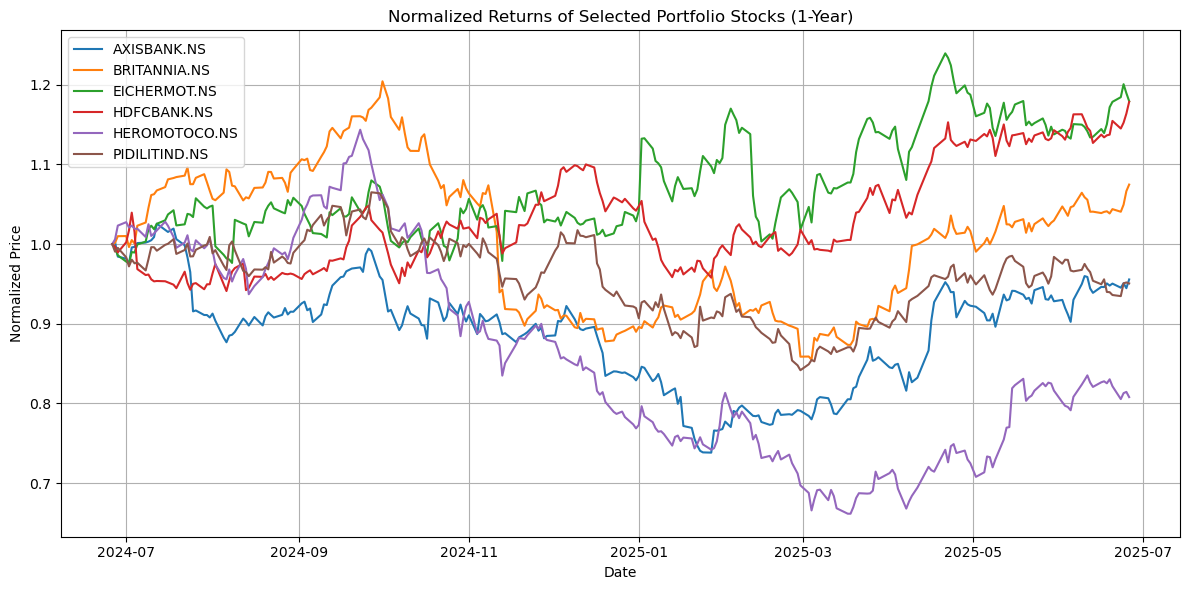

In [25]:
import matplotlib.pyplot as plt

# Normalize prices (start from 1 for comparison)
normalized = price_data / price_data.iloc[0]

# Plot all stock returns
plt.figure(figsize=(12, 6))
for ticker in normalized.columns:
    plt.plot(normalized.index, normalized[ticker], label=ticker)

plt.title('Normalized Returns of Selected Portfolio Stocks (1-Year)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


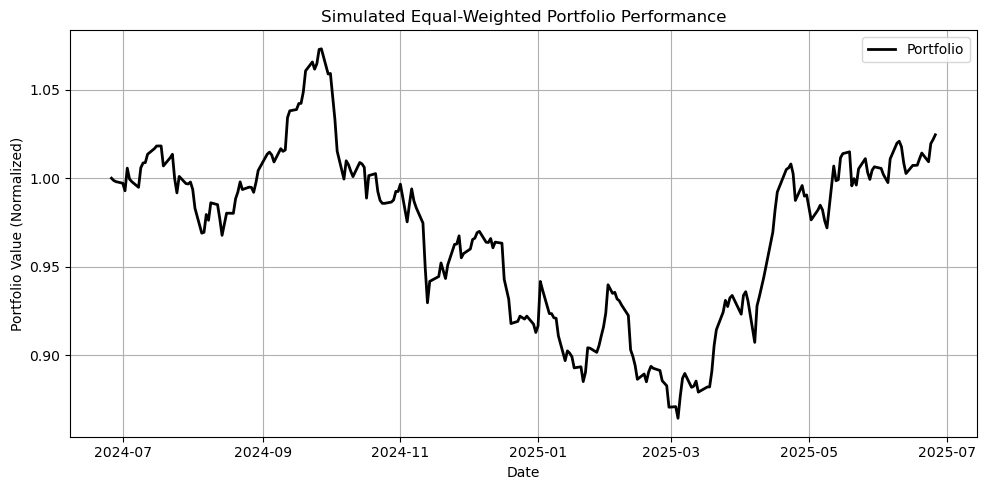

In [26]:
# Equal-weighted portfolio returns: mean of normalized returns
portfolio_value = normalized.mean(axis=1)

# Plot portfolio value over time
plt.figure(figsize=(10, 5))
plt.plot(portfolio_value.index, portfolio_value, color='black', linewidth=2, label='Portfolio')

plt.title('Simulated Equal-Weighted Portfolio Performance')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (Normalized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
cumulative_return = (portfolio_value.iloc[-1] - 1) * 100
print(f"📈 Portfolio cumulative return over 1 year: {cumulative_return:.2f}%")


📈 Portfolio cumulative return over 1 year: 2.45%


In [28]:
df_combined.to_csv("df_combined.csv")
df_momentum.to_csv("df_momentum.csv")


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt


In [2]:
# Define your selected stock tickers
tickers = ['HDFCBANK.NS', 'AXISBANK.NS', 'PIDILITIND.NS', 'BRITANNIA.NS', 'EICHERMOT.NS', 'HEROMOTOCO.NS']

# Set the date range to the past 2 years
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=730)  # 2 years ≈ 730 days

# Download daily adjusted close prices
data = yf.download(tickers, start=start_date, end=end_date, interval='1d', auto_adjust=True)['Close']

# Preview the data
data.head()


[*********************100%***********************]  6 of 6 completed


Ticker,AXISBANK.NS,BRITANNIA.NS,EICHERMOT.NS,HDFCBANK.NS,HEROMOTOCO.NS,PIDILITIND.NS
Date,,,,,,
2023-07-03,980.342224,4943.948730,3551.857666,1678.170166,2761.074463,2547.747314
2023-07-04,968.962646,4945.775391,3327.790771,1686.366699,2885.899902,2546.756348
2023-07-05,964.770142,5030.621094,3237.743408,1632.795776,3008.201660,2584.802490
2023-07-06,979.194336,5107.075684,3152.098145,1634.454468,3021.441406,2624.582275
2023-07-07,975.946838,4989.555664,3115.511719,1620.208008,2998.676270,2588.864746


In [3]:
# Assuming you've already run this earlier:
# data = yf.download(...)

# Save the DataFrame to CSV
data.to_csv("stock_price_2yr_data.csv")

print("✅ Historical stock price data saved to 'stock_price_2yr_data.csv'")


✅ Historical stock price data saved to 'stock_price_2yr_data.csv'


In [4]:
def create_features_labels(df, window=30, prediction_gap=30):
    """
    Parameters:
        df: DataFrame with stock tickers as columns and daily prices as rows
        window: number of days to use for calculating features
        prediction_gap: days ahead to predict the return

    Returns:
        X: DataFrame of features
        y: Series of 30-day future returns
        metadata: List of (ticker, date) for each sample
    """
    X, y, metadata = [], [], []

    for ticker in df.columns:
        series = df[ticker].dropna()
        if len(series) < (window + prediction_gap + 1):
            continue

        for i in range(len(series) - window - prediction_gap):
            current_window = series.iloc[i:i+window]
            current_price = current_window.iloc[-1]
            future_price = series.iloc[i+window+prediction_gap-1]

            # Calculate features
            features = {
                '5d_return': (current_window.iloc[-1] - current_window.iloc[-6]) / current_window.iloc[-6],
                '10d_return': (current_window.iloc[-1] - current_window.iloc[-11]) / current_window.iloc[-11],
                'volatility': current_window.pct_change().std()
            }

            # Target: 30-day return from current day
            target = (future_price - current_price) / current_price

            X.append(features)
            y.append(target)
            metadata.append((ticker, current_window.index[-1]))  # For later reference

    return pd.DataFrame(X), pd.Series(y), metadata


In [5]:
X, y, metadata = create_features_labels(data)


In [6]:
# First, run this if you haven't yet:
# X, y, metadata = create_features_labels(data)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# ➤ Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# ➤ Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# ➤ Make predictions on the test set
y_pred = model.predict(X_test)

# ➤ Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"📊 R² Score: {r2:.2f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")


📊 R² Score: 0.12
📉 Mean Absolute Error (MAE): 0.0595


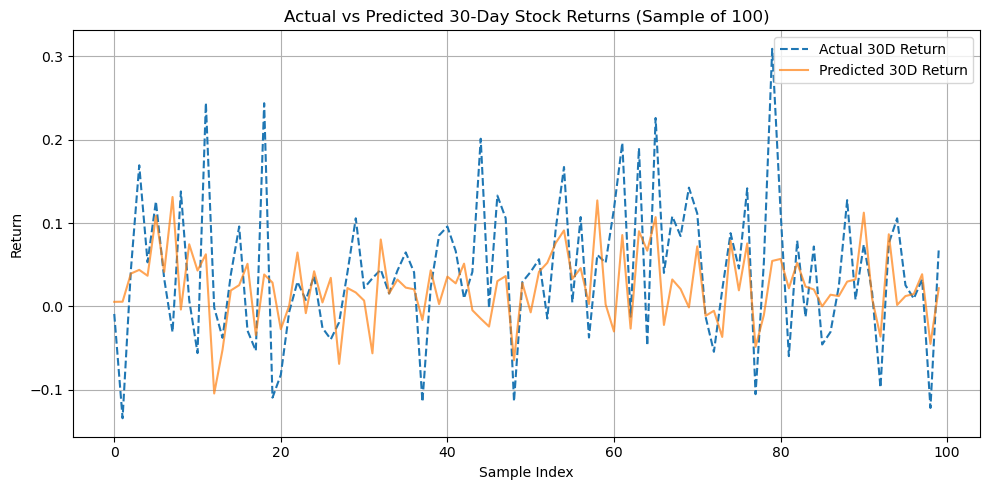

In [7]:
### 📈 Visualizing Actual vs Predicted 30-Day Returns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label="Actual 30D Return", linestyle='--')
plt.plot(y_pred[:100], label="Predicted 30D Return", alpha=0.7)
plt.title("Actual vs Predicted 30-Day Stock Returns (Sample of 100)")
plt.xlabel("Sample Index")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# Create features from the latest 30 days of data
latest_features = {}

for ticker in data.columns:
    series = data[ticker].dropna()
    if len(series) >= 30:
        last_30 = series[-30:]
        try:
            latest_features[ticker] = {
                '5d_return': (last_30.iloc[-1] - last_30.iloc[-6]) / last_30.iloc[-6],
                '10d_return': (last_30.iloc[-1] - last_30.iloc[-11]) / last_30.iloc[-11],
                'volatility': last_30.pct_change().std()
            }
        except:
            continue


In [9]:
# Predict returns for each stock using trained Random Forest model
print("\n📈 Predicted 30-Day Returns from Today:\n")

predicted_returns = {}
for ticker, feats in latest_features.items():
    feat_df = pd.DataFrame([feats])
    pred = model.predict(feat_df)[0]
    predicted_returns[ticker] = pred
    print(f"{ticker}: {pred * 100:.2f}%")



📈 Predicted 30-Day Returns from Today:

AXISBANK.NS: 0.27%
BRITANNIA.NS: -7.83%
EICHERMOT.NS: 7.05%
HDFCBANK.NS: 0.28%
HEROMOTOCO.NS: 3.58%
PIDILITIND.NS: 4.76%


In [10]:
import os

# Get today's date as string
today = datetime.datetime.today().strftime('%Y-%m-%d')

# Create a DataFrame from predictions
pred_df = pd.DataFrame(predicted_returns.items(), columns=['Ticker', 'Predicted_30D_Return'])
pred_df['Prediction_Date'] = today

# Create directory to store prediction files
os.makedirs("predictions", exist_ok=True)

# Save the prediction file
filename = f"predictions/predicted_returns_{today}.csv"
pred_df.to_csv(filename, index=False)

print(f"\n✅ Saved predicted returns to: {filename}")



✅ Saved predicted returns to: predictions/predicted_returns_2025-06-30.csv
